**Notes PLEASE READ:**
*   Two starting files "fj.csv" and "fj_no_profile.csv" are in the shared folder
*   If you want to use data that included the company profile from the beginning (including in word counts, char counts, etc.) use the "fj.csv" otherwise use the "fj_no_profile" file
*   word counts, character counts, and stopwords counts columns added (counted based on a combined job_posting column)
*   Added "NAN Columns" column, which counts how many features were blank or NaN for each row
*   Set up binary columns for if the unstrucutred columns were na or not na (1 or 0)
*   Then dropped all the unstructured columns
*   one-hot encode all the categorical variables
*   Pipeline is set up and works for a basic logistic regression, without any tuning pretty much. Just did this to show a working example of how to use the pipeline
*   **You guys can start at the "Data to Split and Pipeline" section. Do not need to run the other code blocks, except the one with all the imports**







In [ ]:
import pandas as pd
from textblob import TextBlob
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import classification_report
from spellchecker import SpellChecker
nltk.download('stopwords')
nltk.download('punkt')

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fake_jobs = pd.read_csv('fake_job_postings.csv')

In [ ]:
fake_jobs = pd.read_csv('fake_job_postings.csv')
fake_jobs['NAN Columns'] = fake_jobs.isnull().sum(axis=1)
fake_jobs['title_na'] = fake_jobs['title'].isnull()*1
fake_jobs['company_profile_na'] = fake_jobs['company_profile'].isnull()*1
fake_jobs['description_na'] = fake_jobs['description'].isnull()*1
fake_jobs['requirements_na'] = fake_jobs['requirements'].isnull()*1
fake_jobs['benefits_na'] = fake_jobs['benefits'].isnull()*1
#fake_jobs.head()

In [ ]:
fake_jobs = fake_jobs.replace(np.nan, 'MISSING')
fake_jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,required_education,industry,function,fraudulent,NAN Columns,title_na,company_profile_na,description_na,requirements_na,benefits_na
0,1,Marketing Intern,"US, NY, New York",Marketing,MISSING,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,MISSING,0,...,MISSING,MISSING,Marketing,0,4,0,0,0,0,1
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,MISSING,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,MISSING,Marketing and Advertising,Customer Service,0,2,0,0,0,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",MISSING,MISSING,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,MISSING,0,...,MISSING,MISSING,MISSING,0,8,0,0,0,0,1
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,MISSING,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,Bachelor's Degree,Computer Software,Sales,0,1,0,0,0,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",MISSING,MISSING,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,2,0,0,0,0,0


In [ ]:
fj = fake_jobs.copy()
fj_no_profile = fake_jobs.copy().drop(columns = 'company_profile')
#fj_no_profile.head()

In [ ]:
# defining word counting functions
def count_chars(text):
    return len(text)
def count_words(text):
    return len(text.split())
def count_stopwords(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)
def spellcheck(text):
    s = text
    wordlist=s.split()
    spell = SpellChecker()
    amount_miss = len(list(spell.unknown(wordlist)))
    return amount_miss

**Fake Jobs Full Dataset (called "fj")**

In [ ]:
# combining all unstructured data into one column
fj['posting'] = fj['title'] + " " + fj['department'] + \
             " " + fj['company_profile'] + " " + \
             fj['description'] + " " + \
             fj['requirements'] + " " +\
             fj['benefits'] + " " +\
             fj['function'] + " " +\
             fj['required_experience']+ " "+\
             fj["required_education"]+ " " +\
             fj["industry"]

# lowercase all unstructured data
fj['posting'] = fj['posting'].astype(str)
fj['posting'] = fj['posting'].str.lower()

# adding word and character count columns
fj['char_count'] = fj["posting"].apply(lambda x:count_chars(x))
fj['word_count'] = fj["posting"].apply(lambda x:count_words(x))
fj['stopword_count'] = fj["posting"].apply(lambda x:count_stopwords(x))
fj['misspelled_count'] = fj["posting"].apply(lambda x:spellcheck(x))
fj['misspelled_percent'] = fj['misspelled_count']/fj['word_count']
fj['average_word_length'] = fj['char_count']/fj['word_count']

# writing to csv
fj.to_csv('fj.csv')

In [ ]:
# checking to see if the means are different
fj.groupby('fraudulent').mean()

,job_id,telecommuting,has_company_logo,has_questions,NAN Columns,title_na,company_profile_na,description_na,requirements_na,benefits_na,char_count,word_count,stopword_count,misspelled_count,misspelled_percent,average_word_length
fraudulent,,,,,,,,,,,,,,,,
0,8847.490185,0.041319,0.819149,0.502057,3.882979,0.0,0.159927,0.000000,0.149348,0.402375,2768.762607,387.667509,139.214529,61.946338,0.166993,7.276494
1,10767.831409,0.073903,0.326790,0.288684,4.662818,0.0,0.677829,0.001155,0.177829,0.420323,2149.627021,291.279446,95.122402,46.219400,0.160610,7.369684


**Fake Jobs Dataset without "company_profile" (called "fj")**

In [ ]:
fj_no_profile['posting'] = fj_no_profile['title'] + " " + fj_no_profile['department'] + \
             fj_no_profile['description'] + " " + \
             fj_no_profile['requirements'] + " " +\
             fj_no_profile['benefits'] + " " +\
             fj_no_profile['function'] + " " +\
             fj_no_profile['required_experience']+ " "+\
             fj_no_profile["required_education"]+ " " +\
             fj_no_profile["industry"]

# lowercase all unstructured data
fj_no_profile['posting'] = fj_no_profile['posting'].astype(str)
fj_no_profile['posting'] = fj_no_profile['posting'].str.lower()

# adding word and character count columns
fj_no_profile['char_count'] = fj_no_profile["posting"].apply(lambda x:count_chars(x))
fj_no_profile['word_count'] = fj_no_profile["posting"].apply(lambda x:count_words(x))
fj_no_profile['stopword_count'] = fj_no_profile["posting"].apply(lambda x:count_stopwords(x))
fj_no_profile['misspelled_count'] = fj_no_profile["posting"].apply(lambda x:spellcheck(x))
fj_no_profile['misspelled_percent'] = fj_no_profile['misspelled_count']/fj_no_profile['word_count']
fj_no_profile['average_word_length'] = fj_no_profile['char_count']/fj_no_profile['word_count']

# writing to csv
fj_no_profile.to_csv('fj_no_profile.csv')

In [ ]:
# checking to see if the means are different
fj.groupby('fraudulent').mean()

,job_id,telecommuting,has_company_logo,has_questions,NAN Columns,title_na,company_profile_na,description_na,requirements_na,benefits_na,char_count,word_count,stopword_count,misspelled_count,misspelled_percent,average_word_length
fraudulent,,,,,,,,,,,,,,,,
0,8847.490185,0.041319,0.819149,0.502057,3.882979,0.0,0.159927,0.000000,0.149348,0.402375,2768.762607,387.667509,139.214529,61.946338,0.166993,7.276494
1,10767.831409,0.073903,0.326790,0.288684,4.662818,0.0,0.677829,0.001155,0.177829,0.420323,2149.627021,291.279446,95.122402,46.219400,0.160610,7.369684


**#Augmented Train Test Split USE THIS ONE**

In [ ]:
model_data = pd.read_csv('fj.csv', index_col = 0,  encoding='utf-8')

indices = model_data.groupby("company_profile").apply(lambda x: [i for i in x.index])
indices.reset_index()

model_data.drop(['job_id','title','salary_range','description','requirements','benefits','company_profile','posting'], axis = 1, inplace = True)

# Get number of unique countries
def getCountry(location):
  return str(location).split(',')[0]

model_data['country'] = model_data['location'].map(getCountry)
countries = model_data['country'].value_counts()
print('The number of unique values in the "country" field is: {}'.format(len(model_data['country'].value_counts())))
model_data.drop(columns = 'location', axis = 1, inplace = True)

# one-hot encoding categorical variables
categorical_cols = ['country', 'department', 'employment_type', 'required_experience', 'required_education', 'industry', 'function'] 
model_data = pd.get_dummies(model_data, columns = categorical_cols)

# splitting data based on company profile
y = model_data["fraudulent"]
X = model_data.drop('fraudulent', axis = 'columns')

indices_tf = y[[i[0]for i in indices]]
train_idx, test_idx = train_test_split(indices, stratify = indices_tf, test_size=0.20, random_state = 422)
train_idx = np.hstack(train_idx.apply(np.array).values)
test_idx = np.hstack(test_idx.apply(np.array).values)

train_idx.sort()
train_idx

X_train = X.loc[train_idx] 
X_test = X.loc[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

The number of unique values in the "country" field is: 91


In [ ]:
# defining pipeline entries
classifier = LogisticRegression(random_state = 420, max_iter=100)
smt = SMOTE(random_state=420)

# defining the pipeline
pipeline = Pipeline(steps = [['smote', smt],['classifier', classifier]])

In [ ]:
# fitting the pipeline and printing results
pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)
print(classification_report(y_test,y_hat))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.98      0.89      0.93      3403
           1       0.25      0.73      0.37       173

    accuracy                           0.88      3576
   macro avg       0.62      0.81      0.65      3576
weighted avg       0.95      0.88      0.91      3576



**Code not being used from here down**

**Data to Split Original DO NOT USE**

In [ ]:
# READ IN DATA (Choose data with profile field or without)
model_data_raw = pd.read_csv('fj.csv', index_col = 0,  encoding='utf-8')
#model_data_raw = pd.read_csv('fj_no_profile.csv')

# creating copy so original can still be accessed
model_data = model_data_raw.copy()

# droping unstructured columns
model_data.drop(['job_id','title','salary_range','description','requirements','benefits','company_profile','posting'], axis = 1, inplace = True)

# Get number of unique countries
def getCountry(location):
  return str(location).split(',')[0]

model_data['country'] = model_data['location'].map(getCountry)
countries = model_data['country'].value_counts()
print('The number of unique values in the "country" field is: {}'.format(len(model_data['country'].value_counts())))
model_data.drop(columns = 'location', axis = 1, inplace = True)

# one-hot encoding categorical variables
categorical_cols = ['country', 'department', 'employment_type', 'required_experience', 'required_education', 'industry', 'function'] 
model_data = pd.get_dummies(model_data, columns = categorical_cols)

# splitting data into train and test
X = model_data.drop('fraudulent', axis = 'columns')
y = model_data['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.20,
                                                    random_state = 420)

The number of unique values in the "country" field is: 91


In [ ]:
len(train_idx)

14828

In [ ]:
len(test_idx)

3052

In [ ]:
len(model_data)

17880

In [ ]:
len(model_data.columns)

1643

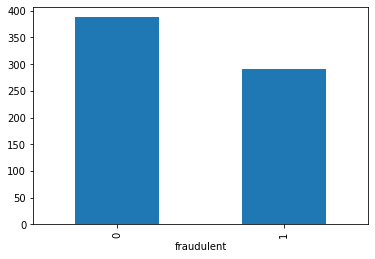

In [ ]:
model_data.groupby('fraudulent')['word_count'].mean().plot(kind = 'bar')

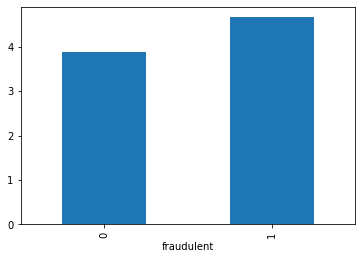

In [ ]:
model_data.groupby('fraudulent')['NAN Columns'].mean().plot(kind = 'bar')